<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

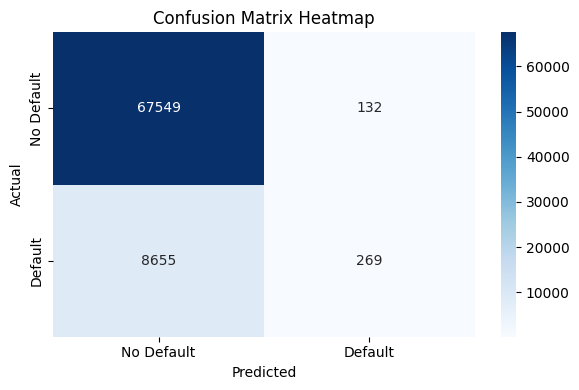

Accuracy:  0.8852946935578617
Precision:  0.6708229426433915
Recall:  0.030143433437920215


In [4]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # To scale/normalize features
from sklearn.ensemble import RandomForestClassifier  # Machine learning model for classification
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score  # Evaluation metrics
import seaborn as sns  # For plotting heatmap of the confusion matrix
import matplotlib.pyplot as plt  # For general plotting

# Load the dataset from CSV file
file_path = "1. Predict Loan Default.csv"
df = pd.read_csv(file_path)  # Read CSV file into a DataFrame

# Display basic information about the dataset and first few rows
df.info()  # Shows data types, non-null counts, and memory usage
df.head()  # Displays the first 5 rows of the dataset

# Drop 'LoanID' column as it is not useful for prediction
df = df.drop(columns=["LoanID"])

# Convert categorical variables to dummy/indicator variables (one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first=True avoids dummy variable trap

# Separate features (X) and target variable (y)
X = df_encoded.drop("Default", axis=1)  # Features (input variables)
y = df_encoded["Default"]  # Target/output variable

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features to bring them to a similar scale
scaler = StandardScaler()  # Initialize scaler
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test_scaled = scaler.transform(X_test)  # Transform test data using the same scaler

# Initialize and train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)  # Instantiate classifier with a fixed random seed
clf.fit(X_train_scaled, y_train)  # Train the classifier on the scaled training data

# Make predictions on the test data
y_pred = clf.predict(X_test_scaled)  # Predict class labels for the test set

# Calculate evaluation metrics
acc = accuracy_score(y_test, y_pred)  # Accuracy: proportion of correctly predicted instances
prec = precision_score(y_test, y_pred)  # Precision: true positives / (true positives + false positives)
rec = recall_score(y_test, y_pred)  # Recall: true positives / (true positives + false negatives)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Creates a matrix of actual vs. predicted labels

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6,4))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],  # X-axis labels
            yticklabels=['No Default', 'Default'])  # Y-axis labels
plt.xlabel('Predicted')  # Label for X-axis
plt.ylabel('Actual')  # Label for Y-axis
plt.title('Confusion Matrix Heatmap')  # Title of the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

# Print out evaluation scores
print("Accuracy: ", acc)  # Print accuracy score
print("Precision: ", prec)  # Print precision score
print("Recall: ", rec)  # Print recall score
